In [1]:
from k_means import KMeans, KMeansPlusPlus
import numpy as np
import argparse
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

In [2]:
def postprocess(labels, means):
    return np.array([means[int(x)].astype(np.uint8) for x in labels])

In [3]:
def run_k_means(path, k, algorithm, name):
    img = mpimg.imread(path).astype(float)
    shp = img.shape
    kmeans = algorithm(k)
    if len(shp) == 2:
        img = img.reshape(list(img.shape) + [1])
    kmeans.fit(img)
    plt.axis('off')
    global new_img
    new_img = postprocess(*kmeans.predict(img))
    new_img = new_img.reshape(shp)
    plt.imshow(new_img, "gray" if len(shp)==2 else None)
    plt.savefig('{}_{}'.format(path, name).replace('.',''), bbox_inches='tight', pad_inches=0)
    plt.show()

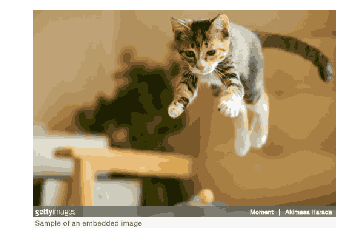

In [4]:
run_k_means("cat.jpg", 20, KMeansPlusPlus, "hov")

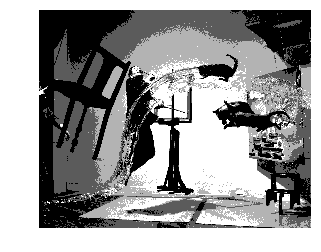

In [5]:
run_k_means("dali.jpg", 4, KMeansPlusPlus, "hov")